# Линейная коррекция

In [1]:
%matplotlib inline

In [2]:
from skimage.io import imread, imshow, imsave
from skimage import img_as_float
from numpy import clip, dstack, roll

In [3]:
img = imread('foto.jpg')

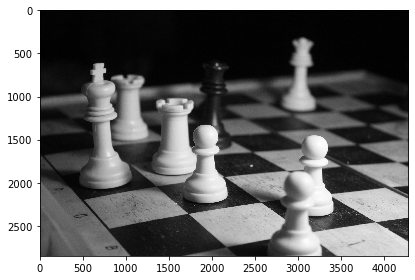

In [4]:
imshow(img)

In [5]:
img_f = img_as_float(img)

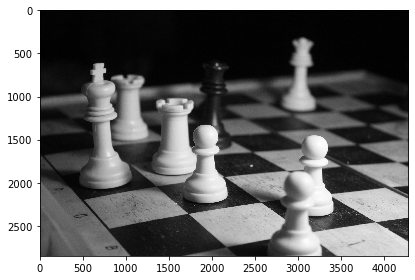

In [6]:
temp = (img_f - img_f.min()) * 255.0 / (img_f.max() - img_f.min())
res_img = temp.astype('uint8')
imshow(res_img)

# Автоконтраст цветного изображения

In [22]:
img = imread('foto1.jpg')
img_f = img_as_float(img)
r = img_f[:, :, 0]
g = img_f[:, :, 1]
b = img_f[:, :, 2] 

In [23]:
y = 0.2126*r + 0.7152*g + 0.0722*b
u = -0.0999*r - 0.3360*g + 0.4360*b
v = 0.6150*r - 0.5586*g - 0.0563*b

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


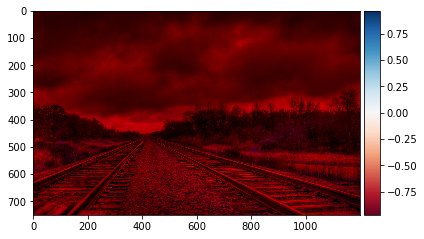

In [24]:
img = dstack((y, u, v))
imshow(img)

In [25]:
r = y + 1.2803 * v
g = y - 0.148 * u - 0.3805 * v
b = y + 2.1279 * u

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


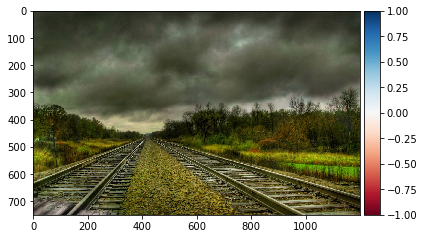

In [26]:
img = dstack((r, g, b))
imshow(img)

# Модель серого мира

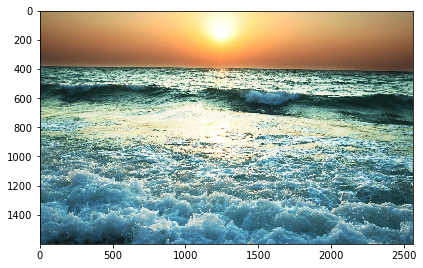

In [27]:
import numpy as np
img = imread('sea.jpg')
img_f = img_as_float(img)
imshow(img)

In [28]:
r = img_f[:, :, 0]
g = img_f[:, :, 1]
b = img_f[:, :, 2] 

In [29]:
avg = (r / 2 + g / 2 + b /2) / 3
rw = (r / 2) / avg
gw = (g / 2) / avg
bw = (b / 2) / avg

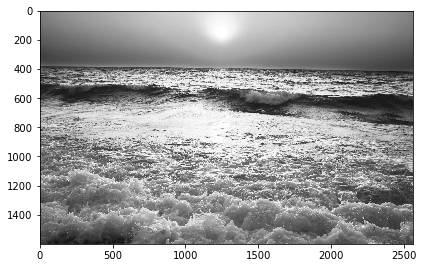

In [30]:
np.seterr(invalid='ignore')
r_r = r / rw 
imshow(r_r)

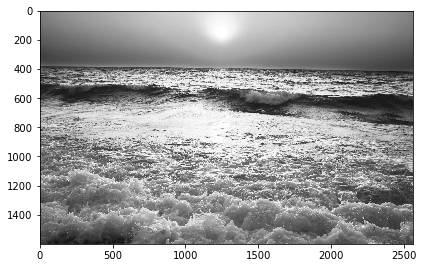

In [31]:
b_b = b / bw 
imshow(b_b)

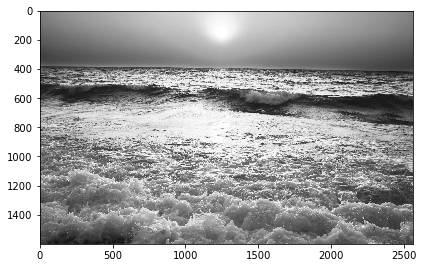

In [32]:
g_g = g / gw 
imshow(g_g)

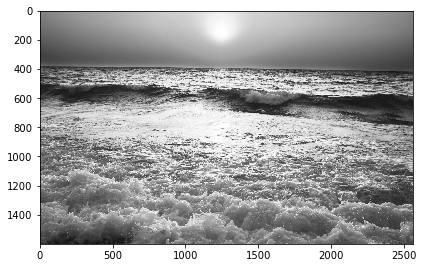

In [33]:
img_rgb = np.dstack((r_r, g_g, b_b))
imshow(img_rgb)

# Выравнивание гистограммы

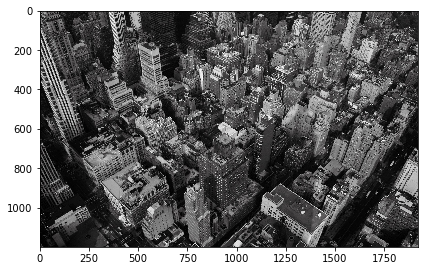

In [36]:
img = imread('city.jpg')
img_f = img_as_float(img)
imshow(img)

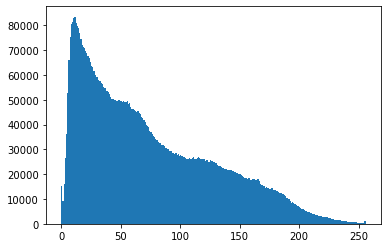

In [41]:
from matplotlib import pyplot as plt


plt.hist(img.ravel(), 256, [0, 256])
plt.show()

In [42]:
h = np.histogram(img_f)
print(h)

(array([1632000, 1354692, 1150765,  763601,  677810,  566214,  410928,
        245009,   87498,   23483], dtype=int64), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))


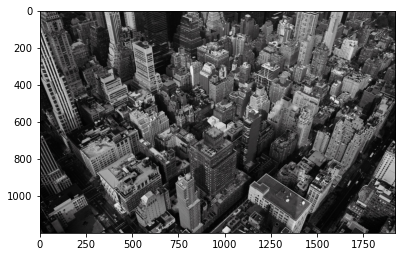

In [62]:
fig = plt.figure(figsize=(14,14))
fig.add_subplot(2,2,1)
plt.imshow(img, cmap="gray")

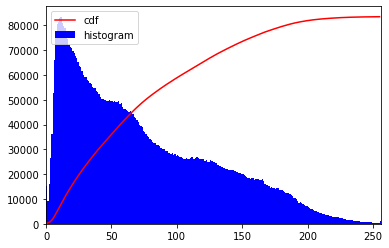

In [59]:
hist, bins = np.histogram(img.flatten(), 256, [0,256])

cdf = hist.cumsum()
cdf_normalized = cdf*float(hist.max())/cdf.max()

fig.add_subplot(2,2,2)
plt.plot(cdf_normalized, color = 'r')
plt.hist(img.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

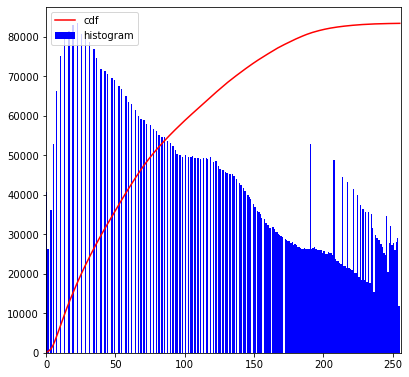

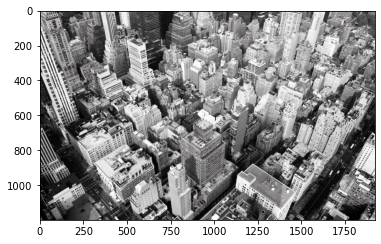

In [63]:
fig2 = plt.figure(figsize=(14,14))
cdf = (cdf-cdf[0]) *255/ (cdf[-1]-1)
cdf = cdf.astype(np.uint8)
img2 = cdf[img]
fig2.add_subplot(2,2,1)
plt.plot(cdf_normalized, color = 'r')
plt.hist(img2.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
fig2.add_subplot(2,2,2)
plt.imshow(img2, cmap="gray")